[*********************100%***********************]  1 of 1 completed


[0]	validation_0-rmse:0.31686
[1]	validation_0-rmse:0.31370
[2]	validation_0-rmse:0.31058
[3]	validation_0-rmse:0.30749
[4]	validation_0-rmse:0.30446
[5]	validation_0-rmse:0.30143
[6]	validation_0-rmse:0.29844
[7]	validation_0-rmse:0.29546
[8]	validation_0-rmse:0.29252
[9]	validation_0-rmse:0.28960
[10]	validation_0-rmse:0.28671
[11]	validation_0-rmse:0.28385
[12]	validation_0-rmse:0.28104
[13]	validation_0-rmse:0.27825
[14]	validation_0-rmse:0.27549
[15]	validation_0-rmse:0.27276
[16]	validation_0-rmse:0.27006
[17]	validation_0-rmse:0.26740
[18]	validation_0-rmse:0.26473
[19]	validation_0-rmse:0.26210
[20]	validation_0-rmse:0.25950
[21]	validation_0-rmse:0.25692
[22]	validation_0-rmse:0.25437
[23]	validation_0-rmse:0.25186
[24]	validation_0-rmse:0.24935
[25]	validation_0-rmse:0.24690
[26]	validation_0-rmse:0.24445
[27]	validation_0-rmse:0.24204
[28]	validation_0-rmse:0.23964
[29]	validation_0-rmse:0.23725
[30]	validation_0-rmse:0.23488
[31]	validation_0-rmse:0.23256
[32]	validation_0-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


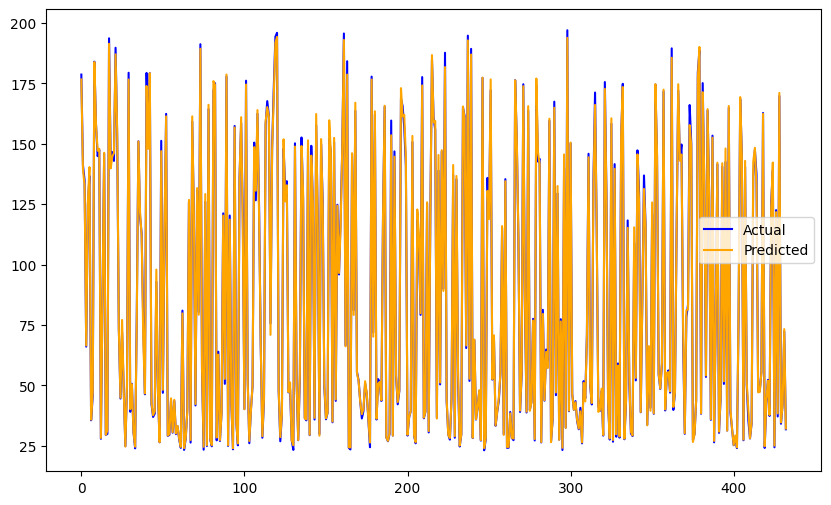

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 1. Data Preprocessing
def load_data(stock_symbol, start_date, end_date, features):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data = data[features]
    return data

def preprocess_data(data, target_col, window_size):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - window_size):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size, target_col])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# 2. Model Training and Evaluation
def train_xgboost(X_train, y_train, X_val, y_val):
    model = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=6, subsample=0.8, colsample_bytree=0.8)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    return model

def evaluate_model(model, X, y, scaler):
    predictions = model.predict(X)
    y_actual = scaler.inverse_transform(y.reshape(-1, 1))
    y_pred = scaler.inverse_transform(predictions.reshape(-1, 1))
    mae = mean_absolute_error(y_actual, y_pred)
    rmse = mean_squared_error(y_actual, y_pred, squared=False)
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    plot_results(y_actual, y_pred)

def plot_results(actual, predicted):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label="Actual", color="blue")
    plt.plot(predicted, label="Predicted", color="orange")
    plt.legend()
    plt.show()

# Example Usage
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-12-31"
features = ["Close"]
window_size = 100

# Load and preprocess data
data = load_data(stock_symbol, start_date, end_date, features)
X, y, scaler = preprocess_data(data.values, target_col=0, window_size=window_size)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the data for XGBoost (requires 2D input)
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

# Train and evaluate model
xgb_model = train_xgboost(X_train, y_train, X_val, y_val)
evaluate_model(xgb_model, X_val, y_val, scaler)